# Predicting and responding to Hotel Booking Cancellations

Hotel Bookings are mainly a result of Human Behavior, and as we already know, it is pretty challenging to predict human behavior. One of the ever evolving industry to get impacted by this is the Hospitality Industry.  
From a customer standpoint, we know that there are both internal and external factors that contribute to the decision to cancel a hotel reservation. 
In contrast, it may not be possible to learn more about why customers cancel hotel reservations or to even forecast the decision of a particular customer. Hence we can leverage Machine learning algorithms to look for patterns and trends to learn more about hotel booking cancellations done by a larger population.

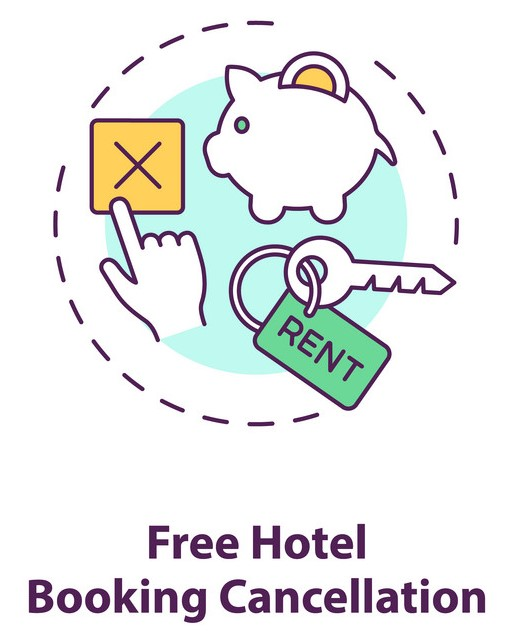

image reference: https://www.alamy.com/free-hotel-booking-cancellation-concept-icon-image405007230.html

#### Our main target variable is ‘is_canceled’. 
The main aim is to create a model which is accurate enough to help us predict booking cancellation.
#### Data Set
The provided data set has 119,390 booking records. These bookings are between July 2015 and August 2017.

In [69]:
#Importing packages

import pandas as pd
import numpy as np


from sklearn import preprocessing as prep
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

import pycountry as pc

import statsmodels.api
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [70]:
# Importing dataset into a DataFrame

df = pd.read_csv('hotel_bookings.csv')
df.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    NaN      NaN   
1                        0                     0       2  ...    NaN      NaN   
2                        0                     1       1  ...    NaN      NaN   
3                        0                     1       1  ...  304.0      NaN   
4                        0                     2       2  ...  240.0      NaN   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out                 7/1/2015   
1                          0           Check-Out                 7/1/2015   
2                          0           Check-Out                 7/2/2015   
3                          0           Check-Out                 7/2/2015   
4                          1           Check-Out                 7/3/2015   

  continent  
0    Europe  
1    Europe  
2    Europe  
3    Europe  
4    Europe  

[5 rows x 33 columns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Before we analyse further, let us understand what the 32 columns represent.

0. hotel<br>
Type of Hotel, Resort/City<br>

1. is_canceled<br> 
Status of the booking (0-not canceled, 1-canceled)<br>

2. lead_time<br>
Count of days between Date of Booking and Arrival Date<br>

3. arrival_date_year<br>
Arrival Year<br>

4. arrival_date_month<br>
Arrival Month<br>

5. arrival_date_week_number<br>
Arrival Week of that Year<br>

6. arrival_date_day_of_month<br>
Arrival Day<br>

7. stays_in_weekend_nights<br>
Bookings for weekend(Saturday/Sunday) nights<br>

8. stays_in_week_nights<br>
Bookings for week(Monday to Friday) nights<br>

9. adults<br>
Bookings done for adults<br>

10. children<br>
Bookings done for children<br>

11. babies<br>
Bookings done for babies<br>

12. meal<br>
Meal type for the booking (no meal plan/ Bed and Breakfast/ Half Board/ Full Board)<br>

13. country<br>
Home country of the customer<br>

14. market_segment<br> 
Market segment of the customers<br>

15. distribution_channel<br>
Middle men who help the hotels connect to the end customer<br>

16. is_repeated_guest<br> 
If the Booking is made by a guest more than once<br>

17. previous_cancellations<br>
Count of bookings canceled in the past<br>

18. previous_bookings_not_canceled<br>
Count of bookings not canceled in the past<br>

19. reserved_room_type<br>
Type of room booked<br>

20. assigned_room_type<br>
Type of room assigned (This can be different that the room booked. Example case: Auto-upgradation<br>

21. booking_changes<br>
Count of changes made between booking time until check-in/cancellation<br>

22. deposit_type<br>
Type of deposit made at the time of booking - None/Refundable/Non-Refundable<br>

23. agent<br>
Agent ID that facilitated the booking<br>

24. company<br>
Company that helped with the booking<br>

25. days_in_waiting_list<br>
Count of days the booking was under wait list before it got confirmed<br>

26. customer_type<br>
Type of Customer (Group/Transient/Contract)<br>

27. adr<br>
Average Daily Rate = Ratio of Sum of Transactions and Nights occupied<br>

28. required_car_parking_spaces<br>
Customer's requirement for Car Parking<br>

29. total_of_special_requests<br>
Count of any special requests made<br>

30. reservation_status<br>
Status of the reservation<br>

31. reservation_status_date<br>
Date of the most recent status change<br>

### Data Preprocessing 

#### 1. Look for any missing data

In [72]:
missing_percentage=round(((df.isnull().sum()/len(df))*100),3)
print(missing_percentage)

hotel                              0.000
is_canceled                        0.000
lead_time                          0.000
arrival_date_year                  0.000
arrival_date_month                 0.000
arrival_date_week_number           0.000
arrival_date_day_of_month          0.000
stays_in_weekend_nights            0.000
stays_in_week_nights               0.000
adults                             0.000
children                           0.003
babies                             0.000
meal                               0.000
country                            0.409
market_segment                     0.000
distribution_channel               0.000
is_repeated_guest                  0.000
previous_cancellations             0.000
previous_bookings_not_canceled     0.000
reserved_room_type                 0.000
assigned_room_type                 0.000
booking_changes                    0.000
deposit_type                       0.000
agent                             13.686
company         

From the above, we can conclude that nearly 94% of the records have nothing under the field 'company', and 13% of the records do not have the agents mentioned. This is a massive amount of data, and we will not be able to drop the records; hence we may want to either replace the null values with something or drop the columns if not needed. 

I will be dropping the column 'company' as it will not be possible to draw inferences with just 5% of the data.
We can replace the missing agents with a value stating that it is unidentified.

I also see that around 0.4% of the records have a country specified and less than 0.004% of data have a count of children mentioned. Since the percentage is fairly low, dropping these records will not affect the analysis. So I will be dropping the records with empty/Null values for country and children. 

In [73]:
#Drop column 'company'
df=df.drop(columns = ['company'])

In [74]:
print(df['agent'].min())

1.0


Since the minimum value for an agent ID is 1, I will be replacing the records with null agent IDs as '0'.

In [75]:
#Replace null values of column agent with 0
df['agent'] = df['agent'].fillna(0)

In [76]:
#Now Drop all records with null values for any column
df=df.dropna()

In [77]:
#Check for any columns with missing values after Data Cleaning
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

While removing the missing value I found that the data type for children is float and I think that should be an integer type.

In [78]:
df['children']=np.int64(df['children'])
df['children'].dtype

dtype('int64')

It seems that reservation_status_date is not in date format, whereas when we saw the output of df.head() it was in datetime format, so I will change the data type for reservation_status_date as well.

In [79]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date'].dtype

dtype('<M8[ns]')

Let us count the records with number of guests = 0

In [80]:
#Count of records with bookings and no guest
df['guest_count']=df['adults'] + df['children'] + df['babies']
len(df[(df['guest_count']==0)])

170

In [81]:
#drop the 170 bookings with no guests and drop df['guest_count']
df=df[df['guest_count']>0]
len(df)

118728

We may also have data where the booking is not canceled and the number of days stayed in the hotel is zero.

In [82]:
#Create a column to calculate total number of days stayed
df['stay_count']=df['stays_in_weekend_nights'] + df['stays_in_week_nights']
len(df[(df['stay_count']==0)&(df['is_canceled']==0)])

617

There are 617 records where the booking was not canceled, however the number of days was still 0. This seems to be corrupt data and we must drop these rows as well.

In [83]:
#Before dropping this data, we should check the timestamp of the data to avoid deleting any active bookings
max(df['arrival_date_year'])

2017

In [84]:
#Since the data is old we can confirm that these bookings were not canceled and had 0 booking days
#drop the 155 bookings with df[stay]
df=df[df['stay_count']>0]
len(df)

118088

In [85]:
df=df.drop(columns = ['guest_count','stay_count'])
df.shape

(118088, 32)

In [86]:
df.rename(columns = {'adr':'average_daily_rate'}, inplace = True)

#### 2. Outlier Detection with 'is_canceled' as target variable

In [87]:
# Import regex module
import re
desc = df.describe()
desc

is_canceled      lead_time  arrival_date_year  \
count  118088.000000  118088.000000      118088.000000   
mean        0.373577     104.796719        2016.158763   
std         0.483755     106.954505           0.707670   
min         0.000000       0.000000        2015.000000   
25%         0.000000      19.000000        2016.000000   
50%         0.000000      70.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     709.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118088.000000              118088.000000   
mean                  27.159059                  15.802139   
std                   13.574838                   8.781606   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118088.000000         118088.000000  118088.000000   
mean                  0.933338              2.514472       1.861832   
std                   0.993050              1.885183       0.574964   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             40.000000      55.000000   

            children         babies  is_repeated_guest  \
count  118088.000000  118088.000000      118088.000000   
mean        0.104507       0.007960           0.029605   
std         0.399718       0.097498           0.169496   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           118088.000000                   118088.000000   
mean                 0.087647                        0.131715   
std                  0.848669                        1.487840   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent  days_in_waiting_list  \
count    118088.000000  118088.000000         118088.000000   
mean          0.218380      74.844980              2.342440   
std           0.638025     107.112707             17.677756   
min           0.000000       0.000000              0.000000   
25%           0.000000       7.000000              0.000000   
50%           0.000000       9.000000              0.000000   
75%           0.000000     152.000000              0.000000   
max          18.000000     535.000000            391.000000   

       average_daily_rate  required_car_parking_spaces  \
count       118088.000000                118088.000000   
mean           102.686974                     0.062115   
std             49.960307                     0.244606   
min             -6.380000                     0.000000   
25%             70.000000                     0.000000   
50%             95.000000                     0.000000   
75%            126.000000                     0.000000   
max           5400.000000                     8.000000   

       total_of_special_requests  
count              118088.000000  
mean             

In [88]:
df_numeric = df.select_dtypes('number').columns
print(len(df_numeric))
print(df_numeric)

19
Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')


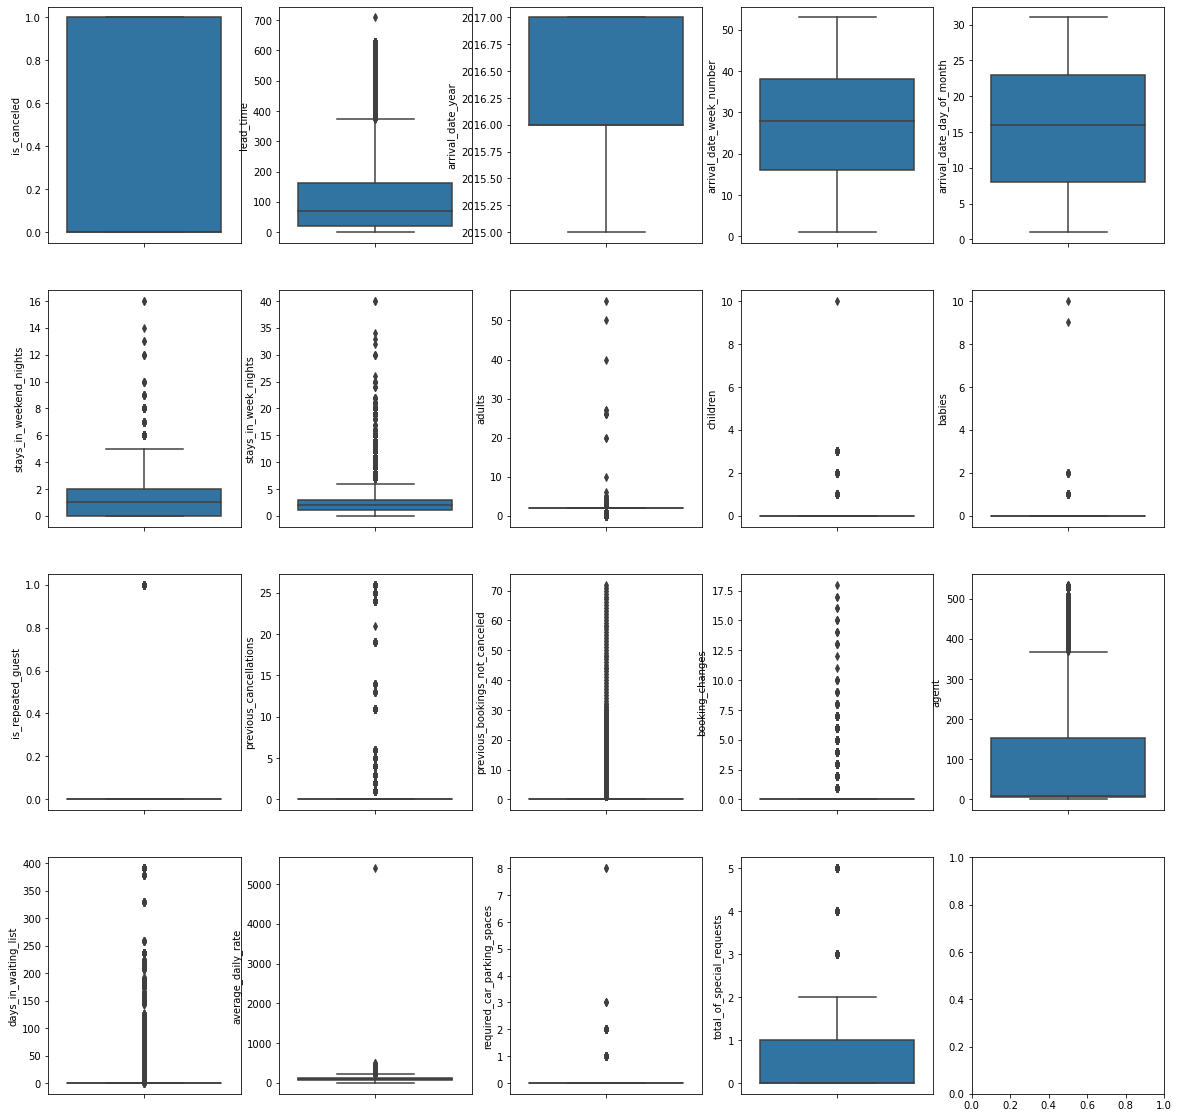

In [89]:
import seaborn as sns
ncols = len(df_numeric)
fig, axes = plt.subplots(nrows=4,ncols=5,figsize=(20,20))
for cols, ax in zip(df_numeric, axes.flatten()):
    sns.boxplot(y=cols, data=df, orient='v', ax=ax)
plt.show()

In [90]:
#Get rid of outliers

#1. lead_time
df['lead_time'] = np.where(df['lead_time'] >400, df['lead_time'].median(),df['lead_time'])
#2. arrival_date_year - No outliers
#3. arrival_date_week_number - No outliers
#4. arrival_date_day_of_month - No outliers
#5. stays_in_weekend_nights - Outliers are not that significant 
#6. stays_in_week_nights - There are quite a few outliers that are beyond 6 to 7 days
df['stays_in_week_nights'] = np.where(df['stays_in_week_nights'] >10, df['stays_in_week_nights'].median(),df['stays_in_week_nights'])
#7. adults - We will replace all the bookings with the neadian(adults) where the count of adults was more than 10.
df['adults'] = np.where(df['adults'] >10, df['adults'].median(),df['adults'])
#8. children - Will do the same for children what we did for adults
df['children'] = np.where(df['children'] >4, df['children'].median(),df['children'])
#9. babies - We will make this binary
df['babies'] = np.where(df['babies'] >1, 1,0)
#10. is_repeated_guest - this is already binary and no outliers
#11. previous_cancellations - We will make this binary
df['previous_cancellations'] = np.where(df['previous_cancellations'] >1, 1,0)
#12. previous_bookings_not_canceled - We will make this binary
df['previous_bookings_not_canceled'] = np.where(df['previous_bookings_not_canceled'] >1, 1,0)
#13. booking_changes - We will make this binary
df['booking_changes'] = np.where(df['booking_changes'] >1, 1,0)
#14. agent - This is an ID so this is not applicable for outlier detection
#15. days_in waiting_list - If this is more than 250 days, we will replace this by median value
df['days_in_waiting_list'] = np.where(df['days_in_waiting_list'] >250, df['days_in_waiting_list'].median(),df['days_in_waiting_list'])
#16. average_daily_rate - Anything that is greater than 1000 will be replaced by the median of average daily rate
df['average_daily_rate'] = np.where(df['average_daily_rate'] >10, df['average_daily_rate'].median(),df['average_daily_rate'])
#17. required_car_parking_spaces - We will make this as Binary
df['required_car_parking_spaces'] = np.where(df['required_car_parking_spaces'] >1, 1,0)
#18. total_of_special_requests -We will leave it as it is

Review of the data after outlier removal

In [91]:
desc = df.describe()
desc

is_canceled      lead_time  arrival_date_year  \
count  118088.000000  118088.000000      118088.000000   
mean        0.373577      97.685379        2016.158763   
std         0.483755      94.826379           0.707670   
min         0.000000       0.000000        2015.000000   
25%         0.000000      19.000000        2016.000000   
50%         0.000000      70.000000        2016.000000   
75%         1.000000     153.000000        2017.000000   
max         1.000000     400.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             118088.000000              118088.000000   
mean                  27.159059                  15.802139   
std                   13.574838                   8.781606   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            118088.000000         118088.000000  118088.000000   
mean                  0.933338              2.468151       1.858910   
std                   0.993050              1.699210       0.483507   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  16.000000             10.000000      10.000000   

            children         babies  is_repeated_guest  \
count  118088.000000  118088.000000      118088.000000   
mean        0.104422       0.000135           0.029605   
std         0.398679       0.011639           0.169496   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max         3.000000       1.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           118088.000000                   118088.000000   
mean                 0.003624                        0.016352   
std                  0.060094                        0.126826   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                  1.000000                        1.000000   

       booking_changes          agent  days_in_waiting_list  \
count    118088.000000  118088.000000         118088.000000   
mean          0.044535      74.844980              2.081448   
std           0.206280     107.112707             14.752589   
min           0.000000       0.000000              0.000000   
25%           0.000000       7.000000              0.000000   
50%           0.000000       9.000000              0.000000   
75%           0.000000     152.000000              0.000000   
max           1.000000     535.000000            236.000000   

       average_daily_rate  required_car_parking_spaces  \
count       118088.000000                118088.000000   
mean            93.874338                     0.000279   
std             10.221915                     0.016715   
min             -6.380000                     0.000000   
25%             95.000000                     0.000000   
50%             95.000000                     0.000000   
75%             95.000000                     0.000000   
max             95.000000                     1.000000   

       total_of_special_requests  
count              118088.000000  
mean             

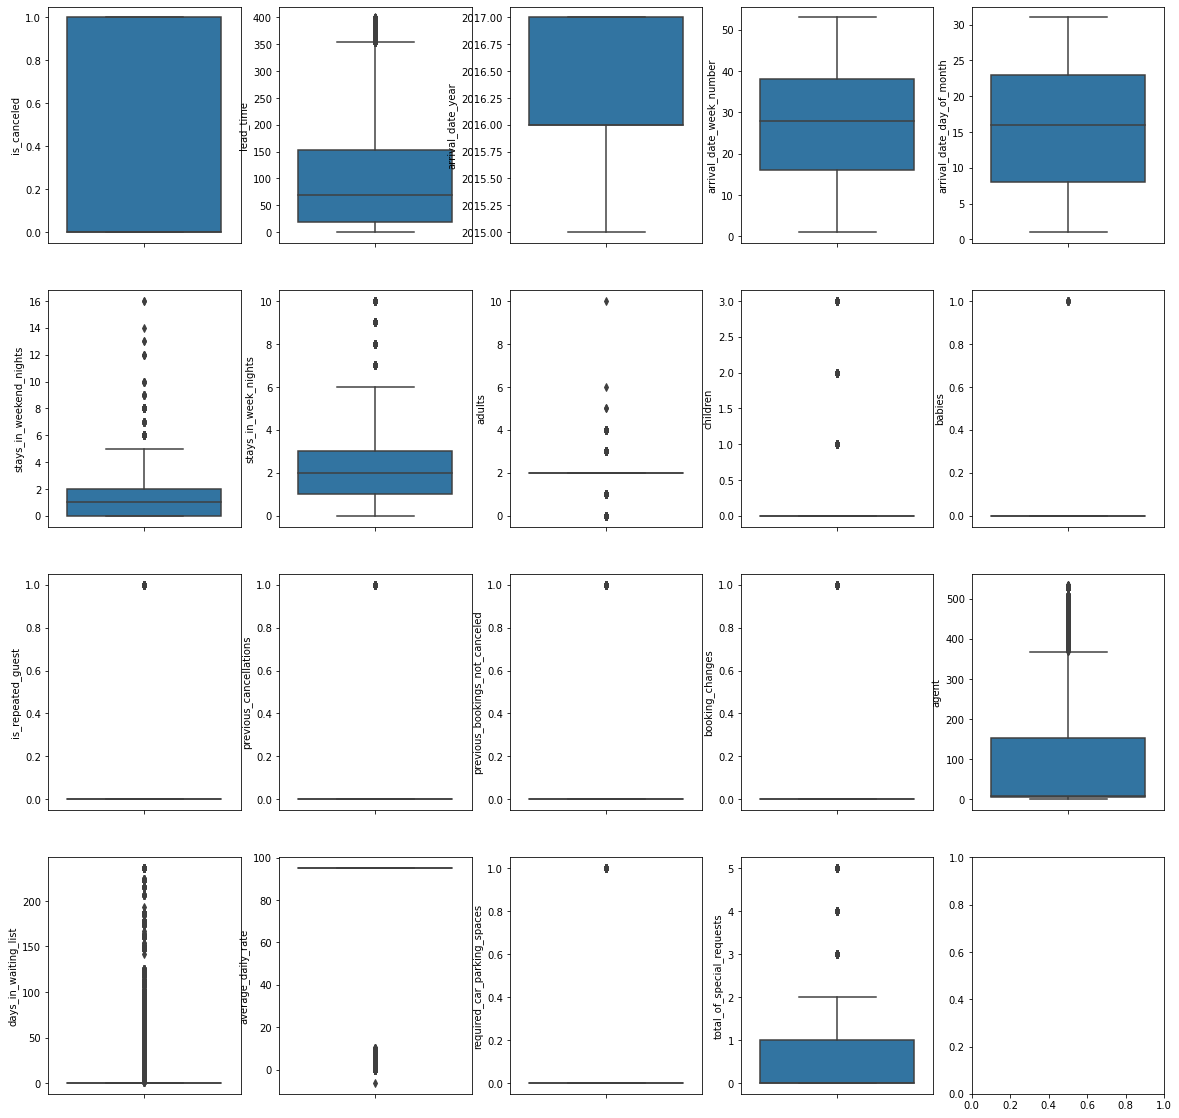

In [92]:
import seaborn as sns
ncols = len(df_numeric)
fig, axes = plt.subplots(nrows=4,ncols=5,figsize=(20,20))
for cols, ax in zip(df_numeric, axes.flatten()):
    sns.boxplot(y=cols, data=df, orient='v', ax=ax)
plt.show()

The data looks much cleaner after outlier removal. We can now explore the data a bit more and see what can we use for our model and how should we handle categorical data.

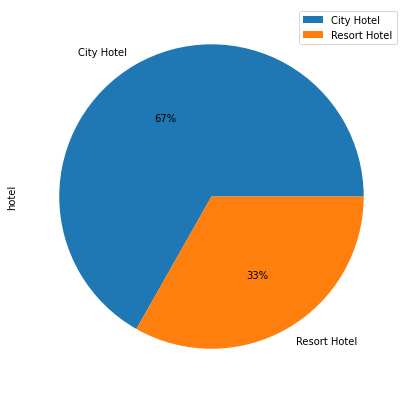

In [93]:
import seaborn as sns
df.hotel.value_counts().plot.pie(autopct='%.0f%%',figsize=(7,7))
#sns.countplot(x='hotel', data=df)
plt.legend()
plt.show()
plt.close()

As we see above that most of the bookings are done for cities, let us look at the cancelation rate at city hotels and resort hotels. But before that let us also review the overall cancellation rate.

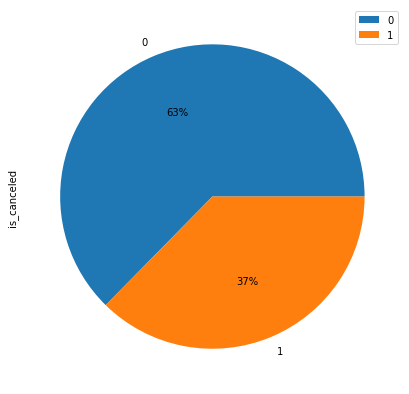

In [94]:
import seaborn as sns
df.is_canceled.value_counts().plot.pie(autopct='%.0f%%',figsize=(7,7))
plt.legend()
plt.show()
plt.close()

So almost 37% of the total bookings made end up getting canceled. From a business point of view this looks like something that we need to work on. Let us review what factors affect this cancellation rate. 

<AxesSubplot:xlabel='hotel', ylabel='count'>

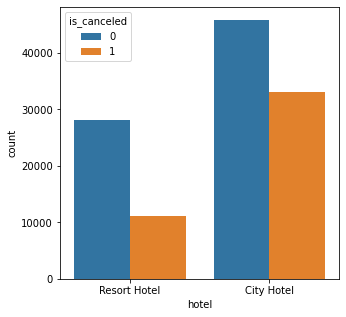

In [95]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'hotel', hue = 'is_canceled')

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

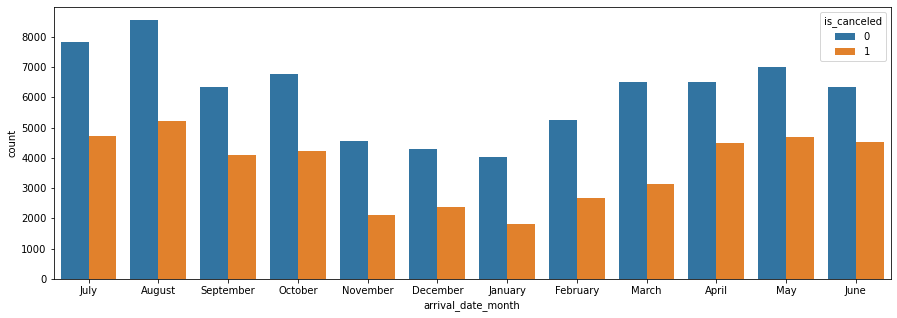

In [96]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'arrival_date_month', hue = 'is_canceled')

So we can see that majorly bookings and cancellations happen during summer and fall seasons, while the end and the beginning of the year is a bit low on hotel reservations. 
Talking about cancelations, it about 50% or more of the bookings done per month.<br>

Now let us see how many of these reservations are done by customers who have already canceled their booking previously.

We see that this is fairly low when compared with the cancelations that are done by customers 

In [97]:
#Checking the %age share of each category in its corresponding metric
#df_objects=df.select_dtypes(object).columns
#print(df_objects)
#for i in df_objects:
#    print(round(df[i].value_counts()/len(df)*100))

#The above statistics will help me to work on categorical variables I have planned to do these steps

#1. Merge some records which have lower percentage share in the corresponding metric.
#2 .One-hot encoding for these columns
#3 .arrival_date_month we would change the data type
#4 .country we may want to merge based on continents and then perform one-hot encoding.

# We will dig more and do the above mentioned in the code below

In [98]:
df_category = df.select_dtypes(include='object').columns
print(df_category)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'continent'],
      dtype='object')


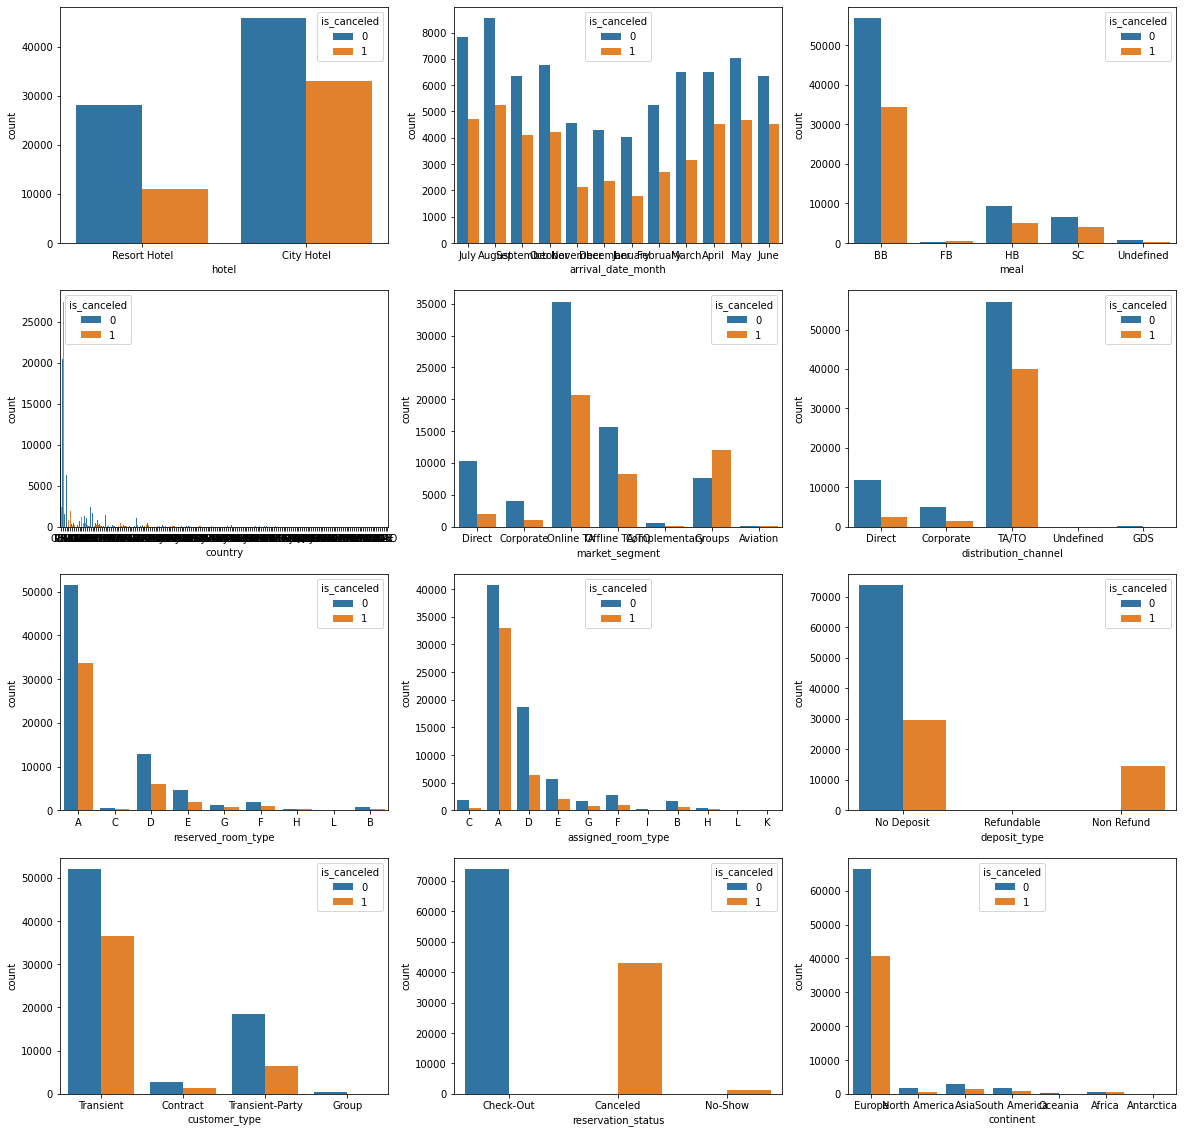

In [99]:
ncols = len(df_category)
fig, axes = plt.subplots(nrows=4,ncols=3,figsize=(20,20))
for cols, ax in zip(df_category, axes.flatten()):
    sns.countplot(x=cols, data=df, ax=ax, hue='is_canceled')
plt.show()

Here are my thoughts based on the categorical variables and the 'is_canceled'
1. Cancellations of resort hotels are much less when compared to the city hotels.
2. Each month cancellations are atleast 50% of the non-canceled reservations.
3. Meals do not seem to impact the cancelations (however it will be a good idea to create dummy variables for BB and group others to make another dummy variable.)
4. Country needs to be grouped based on the reservations, and analyse again
5. Market Segments - Groups tend to have more cancelations when compared to non canceled reservations.<br>
   Offline and Online TA have more reservations but more than number of cancelations are more than 50% of the non-canceled reservations.<br>
   Direct,Corporate, Complementary and Aviation have fewer cancellations when comapred to the non cancelations and can be grouped together.<br>
6. ditribution channels also show the same projections as Market Segments, hence TA/TO can be converted to 1 dummy variable and the rest can be clubbed together.
7. Reserved room type and assigned room type look similar and hence we can create a new column which identifies the bookings if the reserved room type matched the assigned room type and drop these two categorical variables.
8. Ironically Non Refundable bookings have a lot of cancelations and hence we can have all three categories to dummy variables.
9. Transient and transient party have more bookings and a good cancellation rate, they could be a factor in our model hence we can group them and then group the others to create 2 dummy variables.
10. Reservation Status is literally a true representation of cancellation. Hence we can drop this column altogether.   

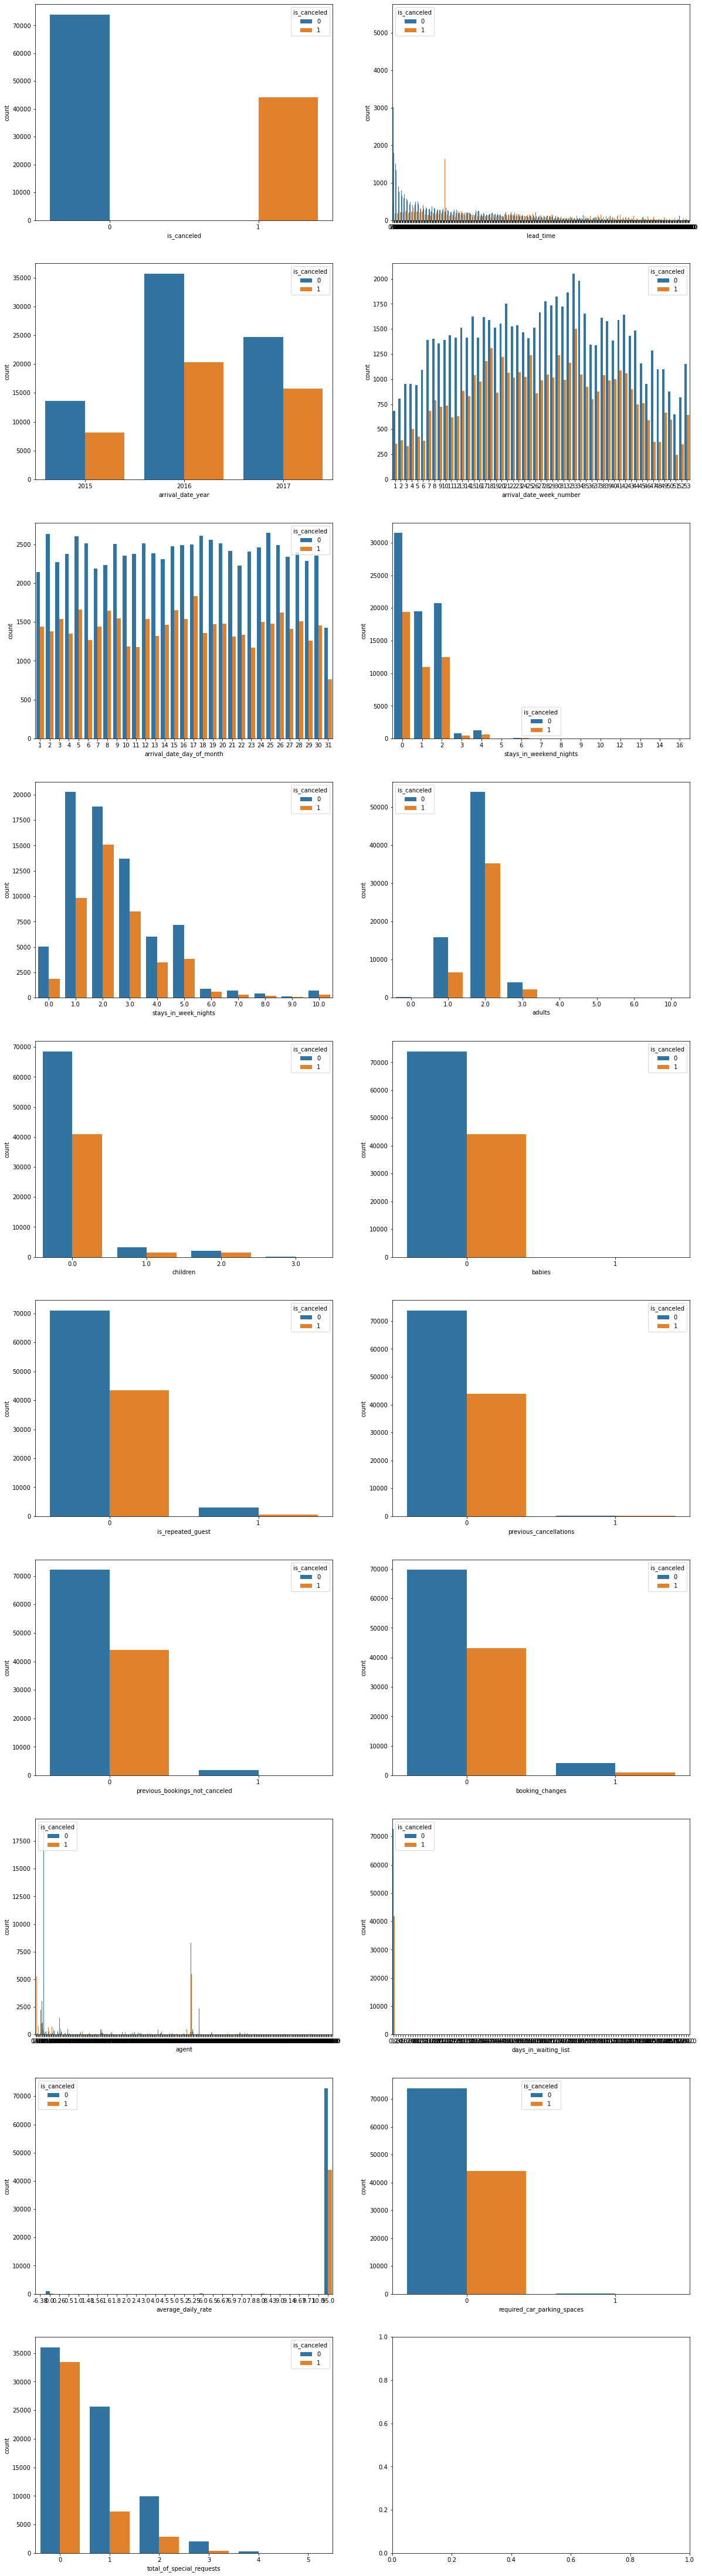

In [100]:
df_numeric = df.select_dtypes('number').columns
ncols = len(df_numeric)
fig, axes = plt.subplots(nrows=10,ncols=2,figsize=(20,80))
for cols, ax in zip(df_numeric, axes.flatten()):
    sns.countplot(x=cols, data=df, ax=ax, hue='is_canceled')
plt.show()

Here are my thoughts on the cancellation rate on the other metrics
1. Cancellation rate is less for lower lead time but increases as the lead time increases, this could be a good metric to measure the model.
2. Year of reservation did not seem to have impacted the cancellation rate quite a lot, they are roughly similar across all the three years.
3. As we have already interpretated that reservations are less during the start and the end of the year and more during mid year. Week 33 has the highest cancellations and the highest booking as well. It could be something that we can use in the model if possible.
4. I don't feel that the day of reservation really matters, the cancellation rate seem to similar throughout the month.
5. We could add up the children and the babies column and have the adults column seperate. We could also have a guest column which would help us with the total number of guests as guests with children are fairly low.
6. If we only look at the repeated guests then we can say that the repeated guests have not canceled the reservation that often, however previous cancellations don't look like impacting the current cancellations.
7. Booking changes are very hard to predict now, we can use that in the model and test or even find correlation.
8. Car Parking does't seem to be a deal breaker at all, whereas averaget daily rate go neck to neck for cancelations and non cancelations.
9. Bookings without special requests seem to have more tendency to get canceled when compared with booking with 1 or more cancelations.

#### 3. One-Hot Encoding

Before we do one hot encoding I need to group the countries based on their continents and for that I have downloaded a data set from https://statisticstimes.com/geography/countries-by-continents.php to give me a list of countries and their corresponding continents.

In [101]:
#Tried to convert country to country using the code but kept running into issues as some of the codes were not 
#processed by this package
#I had to install this package to use the below function - pip install pycountry-convert
#import pycountry_convert as pc

#country_code = pc.country_name_to_country_alpha2(df['country'], cn_name_format="default")
#print(country_code)
#for i in df['country']:
#    if df[i]!=GBR:
#        continent_name = pc.country_alpha2_to_continent_code(df[i])
#       print(continent_name)
#Error with GBR

In [102]:
#Combining categorical variables
#1. Combining Meal
def Encoding(meal):
    if (meal == 'SC')|(meal=='Undefined')|(meal == 'FB')|(meal=='HB'):
        return "others"
    else:
        return "BB"
df['meal'] = df['meal'].apply(lambda x: Encoding(x)) 

#2. Combining Market Segment
def Encoding(market_segment):
    if (market_segment == 'Direct')|(market_segment=='Corporate')|(market_segment == 'Complementary')|(market_segment=='Aviation'):
        return "others"
    elif (market_segment== 'Online TA')|(market_segment=='Online TA/TO'):
        return "online_ta_to"
    elif (market_segment== 'Groups'):
        return "groups"
    else:
        return "others"
df['market_segment'] = df['market_segment'].apply(lambda x: Encoding(x)) 

#3. Combining Distribution Channel
def Encoding(distribution_channel):
    if (distribution_channel== 'Direct')|(distribution_channel=='Corporate')|(distribution_channel== 'Undefined')|(distribution_channel=='GDS'):
        return "others"
    else:
        return "ta_to"
df['distribution_channel'] = df['distribution_channel'].apply(lambda x: Encoding(x))

#4. Combining Customer_type
def Encoding(customer_type):
    if (customer_type== 'Transient')|(customer_type=='Transient-Party'):
        return "transient"
    else:
        return "others"
df['customer_type'] = df['customer_type'].apply(lambda x: Encoding(x))

#Create Dummy variables
df=pd.get_dummies(df,columns=['hotel','meal','market_segment','distribution_channel','deposit_type','customer_type','continent'])


In [103]:
# Create a new field that checks whether if reserved_room_type=assigned_room_type
df['room_reservation_and_assignment']=np.where((df.reserved_room_type == df.assigned_room_type),1,0)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118088 entries, 2 to 119389
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   is_canceled                      118088 non-null  int64         
 1   lead_time                        118088 non-null  float64       
 2   arrival_date_year                118088 non-null  int64         
 3   arrival_date_month               118088 non-null  object        
 4   arrival_date_week_number         118088 non-null  int64         
 5   arrival_date_day_of_month        118088 non-null  int64         
 6   stays_in_weekend_nights          118088 non-null  int64         
 7   stays_in_week_nights             118088 non-null  float64       
 8   adults                           118088 non-null  float64       
 9   children                         118088 non-null  float64       
 10  babies                           118088 non-

In [105]:
#Drop columns

#1. country
df=df.drop(columns = ['country'])

#2. reserved_room_type
df=df.drop(columns = ['reserved_room_type'])

#3. assigned_room_type
df=df.drop(columns = ['assigned_room_type'])

#4. reservation_status
df=df.drop(columns = ['reservation_status']) 

In [106]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

#Create instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df['arrival_date_month'] = labelencoder.fit_transform(df['arrival_date_month'])
df

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
2                 0        7.0               2015                   5   
3                 0       13.0               2015                   5   
4                 0       14.0               2015                   5   
5                 0       14.0               2015                   5   
6                 0        0.0               2015                   5   
...             ...        ...                ...                 ...   
119385            0       23.0               2017                   1   
119386            0      102.0               2017                   1   
119387            0       34.0               2017                   1   
119388            0      109.0               2017                   1   
119389            0      205.0               2017                   1   

        arrival_date_week_number  arrival_date_day_of_month  \
2                             27                          1   
3                             27                          1   
4                             27                          1   
5                             27                          1   
6                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
2                             0                   1.0     1.0       0.0  ...   
3                             0                   1.0     1.0       0.0  ...   
4                             0                   2.0     2.0       0.0  ...   
5                             0                   2.0     2.0       0.0  ...   
6                             0                   2.0     2.0       0.0  ...   
...                         ...                   ...     ...       ...  ...   
119385                        2                   5.0     2.0       0.0  ...   
119386                        2                   5.0     3.0       0.0  ...   
119387                        2                   5.0     2.0       0.0  ...   
119388                        2                   5.0     2.0       0.0  ...   
119389                        2                   7.0     2.0       0.0  ...   

        customer_type_others  customer_type_transient  continent_Africa  \
2                          0                        1                 0   
3                          0                        1                 0   
4                          0                        1                 0   
5                          0                        1                 0   
6                          0                        1                 0   
...                      ...                      ...               ...   
119385                     0                        1                 0   
119386                     0                        1                 0   
119387                     0                        1                 0   
119388                     0                        1                 0   
119389                     0                        1                 0   

        continent_Antarctica  continent_Asia  continent_Europe  \
2                          0               0                 1   
3                          0               0                 1   
4                          0               0                 1   
5                          0               0                 1   
6                          0               0                 1   
...                      ...             ...               ...   
119385                     0               0      

In [107]:
df.columns = df.columns.str.replace(' ', '_')

Below, we try to use Anova table to find the significant features when compared with 'is_canceled'

In [108]:
import statsmodels.api
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('is_canceled~lead_time+arrival_date_year+arrival_date_month+arrival_date_week_number+arrival_date_day_of_month+stays_in_weekend_nights+stays_in_week_nights+adults+children+babies+is_repeated_guest+previous_cancellations+previous_bookings_not_canceled+booking_changes+agent+days_in_waiting_list+average_daily_rate+required_car_parking_spaces+total_of_special_requests+reservation_status_date+hotel_City_Hotel+hotel_Resort_Hotel+meal_BB+meal_others+market_segment_groups+market_segment_online_ta_to+market_segment_others+distribution_channel_others+distribution_channel_ta_to+deposit_type_No_Deposit+deposit_type_Non_Refund+deposit_type_Refundable+customer_type_others+customer_type_transient+continent_Africa+continent_Antarctica+continent_Asia+continent_Europe+continent_North_America+continent_Oceania+continent_South_America+room_reservation_and_assignment', data=df).fit()
anova = sm.stats.anova_lm(model, typ=2)

In [109]:
df_significant_anova=anova[anova['PR(>F)']<=0.05]
print(df_significant_anova)

                                      sum_sq     df             F  \
reservation_status_date          5554.697900  925.0     55.635452   
lead_time                          24.575385    1.0    227.684378   
arrival_date_year                3180.998480    1.0  29471.101439   
arrival_date_month                 31.969628    1.0    296.190061   
arrival_date_week_number         2607.320122    1.0  24156.124651   
arrival_date_day_of_month           4.928063    1.0     45.657186   
stays_in_weekend_nights             5.782140    1.0     53.569982   
stays_in_week_nights               31.112169    1.0    288.245935   
adults                             23.707986    1.0    219.648155   
children                           15.504447    1.0    143.644557   
is_repeated_guest                   1.800109    1.0     16.677525   
previous_cancellations              3.281944    1.0     30.406331   
previous_bookings_not_canceled      3.421299    1.0     31.697424   
booking_changes                   

We do not recieve a lot of inputs from Anova table and hence it is a bot blurry for us to perform analysis based on this.

Let us find the **Correlation** between the metrics and 'is_canceled'.
> I tried to get the correlation matrix and the heatmap, but it was quite huge to derive analysis from 

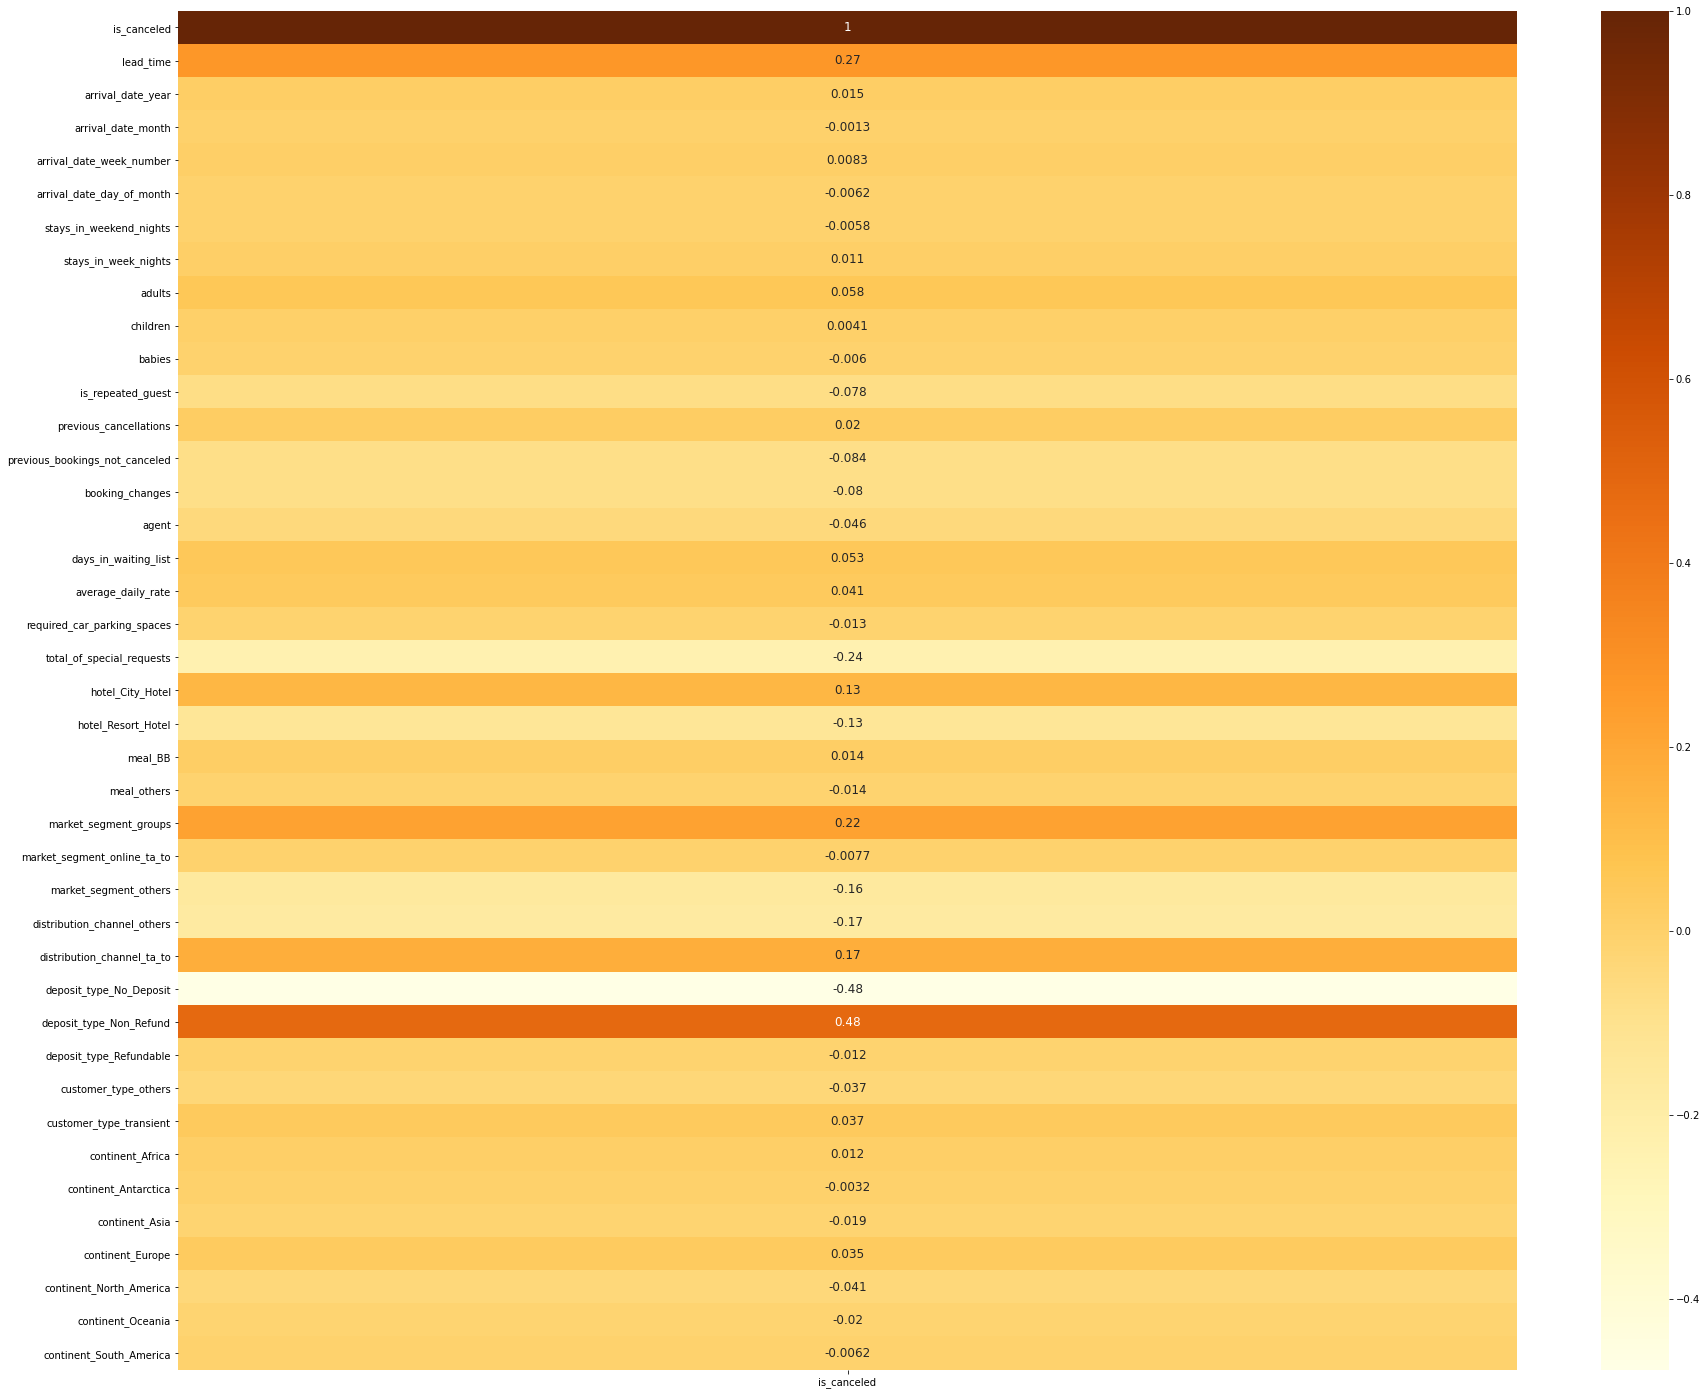

In [110]:
#df.corr()
#plt.figure(figsize=(50, 50))
#sns.heatmap(df.corr(),cmap="YlGnBu",vmin=-1, vmax=1, square=True)

# Since the above codes didn't give us a better O/P we will use 
# the code below to get the correlation of 'is_canceled' with the other metrics.

df_corr = df[df.columns[0:43]].corr()['is_canceled'][:-1]
#set fig size
fig, ax = plt.subplots(figsize=(30,25))
#plot matrix
sns.heatmap(df_corr.to_frame(),annot=True, annot_kws={'size':12},cmap="YlOrBr")
plt.show();

In [111]:
corr_val=df_corr.abs()
print(corr_val>0.15)

is_canceled                        True
lead_time                          True
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
agent                             False
days_in_waiting_list              False
average_daily_rate                False
required_car_parking_spaces       False
total_of_special_requests          True
hotel_City_Hotel                  False
hotel_Resort_Hotel                False
meal_BB                           False
meal_others                       False
market_segment_groups              True


From the above I can see that columns such as lead_time,total_of_special_requests,market_segment_groups,market_segment_others,distribution_channel_others,
distribution_channel_ta_to,deposit_type_No_Deposit,deposit_type_Non_Refund seem to be somewhat correlated.

Let us now find the **Covariance** between 'is_canceled' and the other metrics

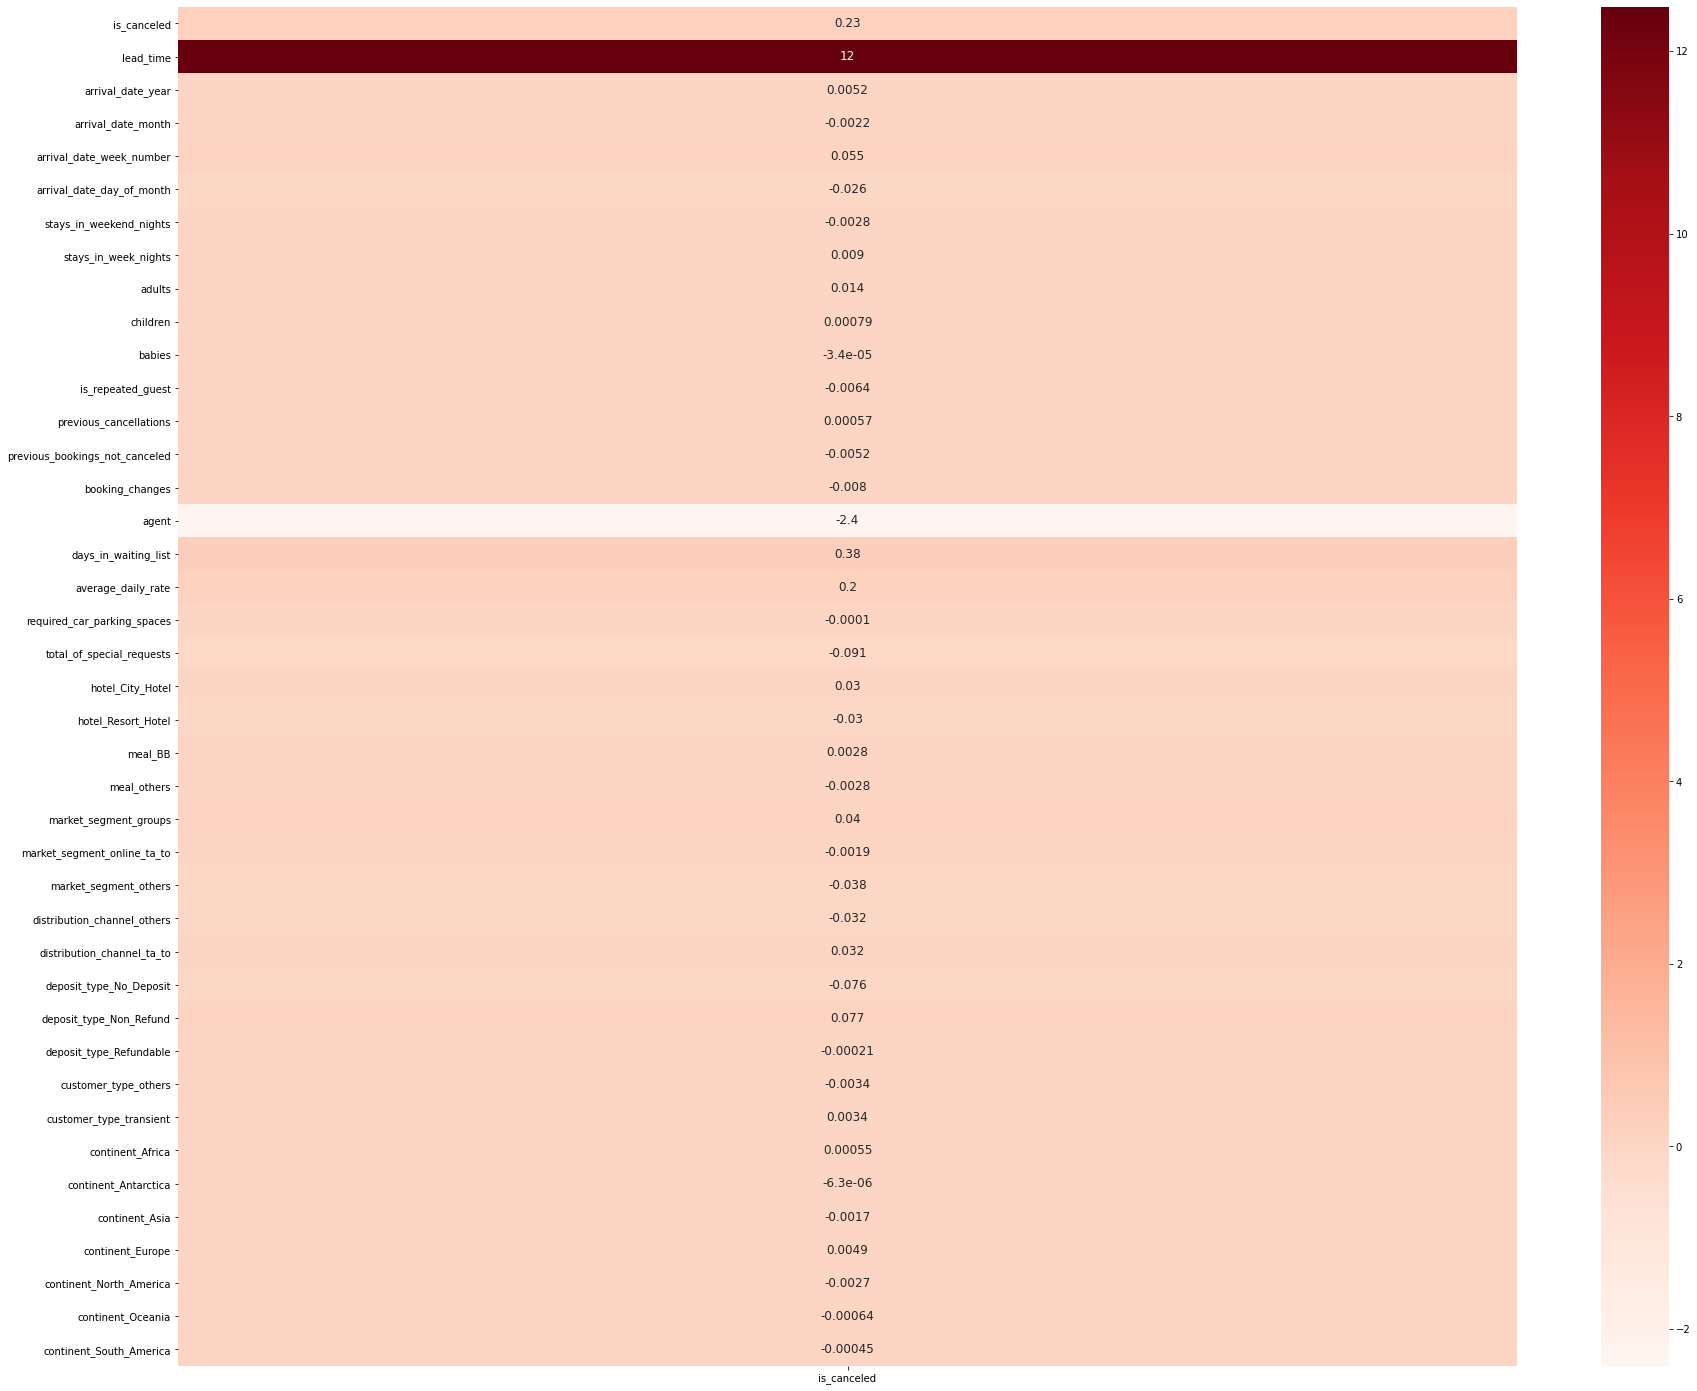

In [112]:
df_cov = df[df.columns[0:43]].cov()['is_canceled'][:-1]
#set fig size
fig, ax = plt.subplots(figsize=(30,25))
#plot matrix
sns.heatmap(df_cov.to_frame(),annot=True, annot_kws={'size':12},cmap="Reds")
plt.show();

Covariance doesn't seem to tell us more about the relation and theimpact of 'is_canceled' and others.

In [113]:
#In order to standardize we may have to drop revervation_status_date as it is in datetime format
df=df.drop(columns = ['reservation_status_date'])

Let us Normalize the data now, before we feed it in the Models

In [114]:
#We Normalize our Data in this section
#In machine learning, normalization is a data preparation procedure that is often utilized.
#The technique of changing the values of numeric columns in a dataset to a comparable scale without 
#distorting the ranges of values or obliterating information is known as normalization.

X = df.drop(columns=['is_canceled','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','distribution_channel_others','distribution_channel_ta_to',])
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y, test_size=0.30)

#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

### Logistic Regression - 
The method of modeling the likelihood of a discrete result given an input variable is known as logistic regression. The most frequent logistic regression models have a binary result, which might be true or false, yes or no, and so forth.

In [47]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Store predicted probability for Completed task_Yes = 1
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)

In [49]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
LRresult = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
LRresult

threshold  recall   FPR   FNR  F1_Score  Accuracy
0         0.0   1.000  1.00  0.00      0.54      0.37
1         0.1   0.953  0.74  0.05      0.60      0.52
2         0.2   0.863  0.50  0.14      0.64      0.64
3         0.3   0.779  0.33  0.22      0.67      0.71
4         0.4   0.686  0.20  0.31      0.68      0.76
5         0.5   0.608  0.11  0.39      0.68      0.78
6         0.6   0.493  0.05  0.51      0.63      0.78
7         0.7   0.385  0.01  0.61      0.55      0.76
8         0.8   0.336  0.00  0.66      0.50      0.75
9         0.9   0.295  0.00  0.70      0.46      0.74
10        1.0   0.000  0.00  1.00      0.00      0.63

The Model Accuracy is comparatively low, but with all the variables into consideration and the rigorous data cleaning I am pretty confident about the accuracy level.



### kNN

In [62]:
param_grid = {'n_neighbors': np.arange(1, 8)}
kNNGrid=GridSearchCV(estimator= KNeighborsClassifier(),
             param_grid=param_grid,
            scoring={'f1','accuracy','recall','precision'},
              refit='accuracy')

In [63]:
kNNGrid_results = kNNGrid.fit(X_train, y_train).cv_results_

In [64]:
kNNGrid_results

{'mean_fit_time': array([0.019631  , 0.01562877, 0.01572394, 0.02149243, 0.01753402,
        0.01530561, 0.01875553]),
 'std_fit_time': array([6.19555644e-03, 1.12234137e-06, 1.87659807e-04, 8.31050657e-03,
        7.25829287e-03, 2.75438977e-03, 6.24961871e-03]),
 'mean_score_time': array([10.13503957, 10.75015516, 11.57510691, 17.14051609, 17.22521696,
        17.18493705, 17.37703395]),
 'std_score_time': array([0.46534272, 0.18001504, 0.32567903, 0.39593625, 0.45326326,
        0.24189431, 0.24156209]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},
  {'n_neighbors': 7}],
 'split0_test_f1': array([0.72032129, 0.69155169, 0.71436882, 0.69161815, 0.71427363,
        0.69232889, 0.71033005]),
 'split1_test_f1'

In [66]:
kNNresults=pd.DataFrame(kNNGrid_results)
kNNresults=kNNresults[['mean_test_precision','mean_test_accuracy','mean_test_f1','mean_test_recall']]
kNNresults['k']=[1,2,3,4,5,6,7]
kNNresults.set_index('k')

mean_test_precision  mean_test_accuracy  mean_test_f1  mean_test_recall
k                                                                         
1             0.709207            0.786332      0.717291          0.725583
2             0.829625            0.800861      0.687955          0.587630
3             0.731004            0.791425      0.714561          0.698867
4             0.808086            0.799144      0.692857          0.606412
5             0.743915            0.793228      0.711050          0.680991
6             0.798465            0.796893      0.691901          0.610460
7             0.748208            0.791861      0.705555          0.667519

In [67]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=kNNresults['k'], 
                         y=kNNresults['mean_test_precision'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=kNNresults['k'], 
                         y=kNNresults['mean_test_accuracy'],
                         mode='lines+markers',
                         name='Accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=kNNresults['k'], 
                         y=kNNresults['mean_test_f1'],
                         mode='lines+markers',
                         name='F1',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=kNNresults['k'], 
                         y=kNNresults['mean_test_recall'],
                         mode='lines+markers',
                         name='Recall',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='k',
                   yaxis_title='Value')


fig.show()

In [68]:
# Diff thresholds at chosen k
# k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train,y_train)
# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []
Precision=[]

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    precision = metrics.precision_score(y_test, y_pred_class).round(3)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
    Precision.append(precision)
  

    # Create dataframe
kNNresults = pd.DataFrame({"Threshold":threshold,
                       "Recall":recall,
                       "F1_Score": F1,
                       "Accuracy": Accuracy,
                        "Precision": Precision
                       })


C:\Users\akash\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [69]:
# Create Plot to observe different performance at different k
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=kNNresults['Threshold'], 
                         y=kNNresults['Recall'],
                         mode='lines+markers',
                         name='Recall',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=kNNresults['Threshold'], 
                         y=kNNresults['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=kNNresults['Threshold'], 
                         y=kNNresults['F1_Score'],
                         mode='lines+markers',
                         name='F1_Score',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=kNNresults['Threshold'], 
                         y=kNNresults['Precision'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='Threshold',
                   yaxis_title='Value')


fig.show()

With Cross Validation on the kNN model I believe that the accuracy seems pretty decent espcially that we had taken k as 7 
80% accuracy on the test data seems good, I believe we could still increase the accuracy scoring by tuning the hyperparameters though. 
### Random Forest

In [68]:
# Construct Grid Parameters
%time
rf_params = {
    'min_samples_split' : [3,6,9,12],
    'min_samples_leaf': [1,2]
}

# Perform Grid Search
rf_gs = GridSearchCV(RandomForestClassifier(random_state=190),
                 rf_params,
                 cv = 5,
                 scoring = 'accuracy')
rf = rf_gs.fit(X_train, y_train)

Wall time: 0 ns


In [55]:
# Scoring 
print(f'Best Training Accuracy: {rf.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {rf.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(rf.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

Best Training Accuracy: 0.8838872019452947
Best Testing Accuracy: 0.8363395150591357
Cross-val-score: 0.8388574881936954


With the cross validation score of 83% Random Forest tells us that our training data was a good representation of the test data. I would say that the model does overfit a tad bit as the Training accuracy is a bit more than the accuracy for the test data.

### Neural Networks

In [115]:
#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=[20, 10], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 0.814
Test accuracy: 0.810
F1 score: 0.711
[[20435  1757]
 [ 4969  8266]]


The confusion matrix is quite good with most of the data as TN and TP, as compared to the FN and FP which is roughly 20% of the data. 

This is represented by the accuracy of the Test Data as well, which is very close to the training data, eventually point as that the model does not overfit nor underfit.  

### Decision Tree - Pruning

In [72]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
ccp_alphas = np.unique(np.abs(ccp_alphas.round(6)))
ccp_alphas = ccp_alphas[ccp_alphas>0]

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=1021, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha','mean_accuracy','std']
                            )

In [74]:
alpha_results.sort_values(by=['mean_accuracy'])

alpha  mean_accuracy       std
166  0.015549       0.749023  0.002623
165  0.014211       0.761669  0.015845
164  0.007484       0.776145  0.012278
163  0.005471       0.782016  0.006351
162  0.003436       0.790676  0.003607
..        ...            ...       ...
38   0.000039       0.823205  0.002546
39   0.000040       0.823273  0.002566
40   0.000041       0.823296  0.002383
42   0.000043       0.823307  0.002582
41   0.000042       0.823318  0.002446

[167 rows x 3 columns]

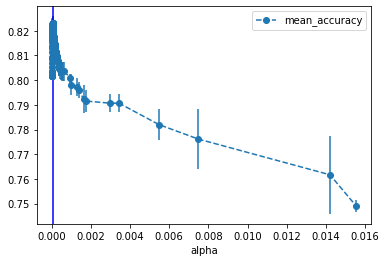

In [75]:
best_alpha = 0.000042
alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--'
                  )
plt.axvline(x=0.000042, color='blue')

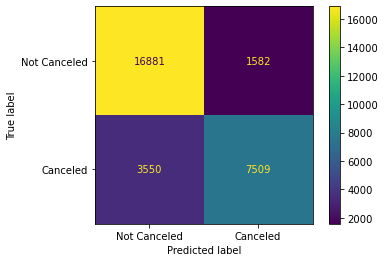

In [76]:
# Build and train a new Decision tree using the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=100,
                                      ccp_alpha=best_alpha
                                     )
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test,
                      display_labels=['Not Canceled','Canceled']
                     )

In [78]:
recall = metrics.recall_score(y_test,clf_dt_pruned.predict(X_test)).round(3)
f1_value = metrics.f1_score(y_test,clf_dt_pruned.predict(X_test)).round(2)
accuracy_value = metrics.accuracy_score(y_test,clf_dt_pruned.predict(X_test)).round(2)
precision = metrics.precision_score(y_test,clf_dt_pruned.predict(X_test)).round(3)
print('recall=',recall,'f1_value=',f1_value,'accuracy_value=',accuracy_value,'precision=',precision)

recall= 0.679 f1_value= 0.75 accuracy_value= 0.83 precision= 0.826


The confusion matrix seems to be better than that for Neural Networks model. We see that the accuracy rate of the Decision Tree is around 83% which is fair enough considering we performed pruning. The alpha results also have a similar accuracy rate which predicts that our model does not overfit or underfit.

In [118]:
# Consolidating Model Performance
Accuracy_Scores = pd.DataFrame(data=[ ('Logistic Regression',0.78), ('KNN Classifier',0.80), ('Random Forest',0.83), ('Neural Network',0.81),('Decision Tree',0.83)],columns=['Model', 'Accuracy'])
Accuracy_Scores

Model  Accuracy
0  Logistic Regression      0.78
1       KNN Classifier      0.80
2        Random Forest      0.83
3       Neural Network      0.81
4        Decision Tree      0.83

In [120]:
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1'], 
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                 lg_params,
                 cv = 5,
                 scoring = 'accuracy')
lg = lg_gs.fit(X_train_mm, y_train)

In [121]:
# Scoring 
print(f'Best Training Accuracy: {lg.score(X_train_mm, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test_mm, y_test)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

Best Training Accuracy: 0.7877959376247565
Best Testing Accuracy: 0.787055070991052
Cross-val-score: 0.7878107842970243


In [122]:
# Creating a dataframe of features and their associated logistic regression coefficients: 
coefficients = pd.DataFrame(lg.best_estimator_.coef_[0], X_train.columns)
coefficients.rename(columns = {0: 'coef'}, inplace=True)

In [123]:
# Filtering the ten features with the stongest coefficients 
top_coef = coefficients[(coefficients['coef'] > 1.8) | (coefficients['coef'] < -1.5)].copy()

# Adding the exponentiated coefficients 
top_coef['exp'] = np.exp(top_coef['coef'])
# Adding the percent likelihood calculation to interpret the coefficients 
top_coef['percent'] = (top_coef['exp']-1)*100
top_coef.sort_values('coef')

coef         exp       percent
total_of_special_requests       -3.572384    0.028089    -97.191120
required_car_parking_spaces     -3.248231    0.038843    -96.115715
previous_cancellations           1.836399    6.273903    527.390257
room_reservation_and_assignment  1.928898    6.881922    588.192174
adults                           2.149321    8.579035    757.903487
deposit_type_Non_Refund          5.234934  187.716665  18671.666535

## Conclusion and Final Thoughts

Looking at the accuracy rate and both Random Forest and Decision Tree Models have perfomed better than the other models. This was also the expected as my test runs had similar results. (Refer to the runs at the end of the notebook.)

Looking at the major factors that affect the cancellation rate are the number of special requests, car parking availability, previous cancellations, and one of the most important factors seem the added metric based on room reservation and assignment, number of adults and the non refundable deposit type which has the a lot of cancellations with respect to the total number of reservations in that category. 

To me that seems strange as non refundable reservations should ideally have the least cancellations, or it could be that the deposit amout was quite low. We could further look into the above metrics and dive deeper if needed. 



Note to the professor:

Thank you Dr. G for giving us this data to explore. It was a great learning experience at every step of this assignment. I would love to hear some feedback, especially on the EDA part as that was one point where I spent way too much time that I had expected. 
I think it was also necessary to do that so that my model would produce a good accuracy rate. Do let me know if there is a way I could tune my models, I have tried to make the best use of Cross Validation at step and fine tune the hyper parameters but I would love to hear your thoughts. 

Thanks!
Akash

### test runs

I was not really sure of the results above hence I tried to run some models without perfoming Cross Validation, just to check if the above runs to check the rate of efficency of the above runs, feel free to ignore this section.

#### kNN

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, pred_knn)
print ('Test Accuracy : {:.2f}%'.format(accuracy_knn*100))

Test Accuracy : 79.93%


In [51]:
print(classification_report(pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     23278
           1       0.69      0.75      0.72     12149

    accuracy                           0.80     35427
   macro avg       0.78      0.79      0.78     35427
weighted avg       0.80      0.80      0.80     35427



#### Decision Tree

In [52]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)
pred_decision_tree = model_decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, pred_decision_tree)
print ('Test Accuracy : {:.2f}%'.format(accuracy_decision_tree*100))

Test Accuracy : 80.34%


In [53]:
print(classification_report(y_test, pred_decision_tree))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     22192
           1       0.74      0.73      0.74     13235

    accuracy                           0.80     35427
   macro avg       0.79      0.79      0.79     35427
weighted avg       0.80      0.80      0.80     35427



#### SVC

In [56]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
pred_svc = model_svc.predict(X_test)
accuracy_svc =  accuracy_score(y_test, pred_svc)
print ('Test Accuracy : {:.2f}%'.format(accuracy_svc*100))

Test Accuracy : 67.52%


In [57]:
print(classification_report(pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79     31436
           1       0.22      0.72      0.33      3991

    accuracy                           0.68     35427
   macro avg       0.58      0.69      0.56     35427
weighted avg       0.87      0.68      0.73     35427



<AxesSubplot:>

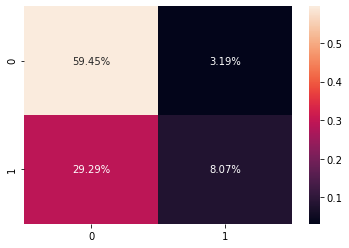

In [58]:
cf_matrix_svc = confusion_matrix(y_test, pred_svc)
sns.heatmap(cf_matrix_svc/np.sum(cf_matrix_svc), annot=True,fmt= '0.2%')

#### Random Forest

In [54]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
pred_rfc = model_rfc.predict(X_test)
acc_rfc = accuracy_score(pred_rfc, y_test)
print ('Test Accuracy : {:.2f}%'.format(acc_rfc*100))

Test Accuracy : 82.83%


In [55]:
print(classification_report(pred_rfc, y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     23168
           1       0.73      0.79      0.76     12259

    accuracy                           0.83     35427
   macro avg       0.81      0.82      0.81     35427
weighted avg       0.83      0.83      0.83     35427

